In [1]:
import sys

from sympy.physics.units.systems.si import units


sys.path.insert(0, '/Users/sam/PycharmProjects/Quantum-Control/NewModule')
%matplotlib inline


In [2]:
from arc import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
atom = Calcium40()



In [6]:
atom.getQuantumDefect(35,8,8,s=0)

-0.000794377080565605

In [ ]:
print(atom.getEnergy(35, 1, 1, s=0))

# Load parameters for Calcium


nmin = 33  # Minimum n
nmax = 37 # Maximum n
lmin = 0  # Minimum l
lmax = 8  # Maxmium l

# Plot Energy Levels of Cesium
levels = LevelPlot(atom)
levels.makeLevels(nmin, nmax, lmin, lmax, sList=[0,1])
levels.drawLevels()
levels.showPlot()

In [9]:
atom.getEnergy(35,1,1,0.5)

-0.01240715602794847

Found  207  states.
Generating matrix...
0%<class 'int'>
1%<class 'int'>
2%<class 'int'>
3%<class 'int'>
4%<class 'int'>
5%<class 'int'>
6%<class 'int'>
7%<class 'int'>
8%<class 'int'>
9%<class 'int'>
10%<class 'int'>
11%<class 'int'>
12%<class 'int'>
13%<class 'int'>
13%<class 'int'>
14%<class 'int'>
15%<class 'int'>
16%<class 'int'>
17%<class 'int'>
18%<class 'int'>
19%<class 'int'>
20%<class 'int'>
20%<class 'int'>
21%<class 'int'>
22%<class 'int'>
23%<class 'int'>
24%<class 'int'>
25%<class 'int'>
26%<class 'int'>
26%<class 'int'>
27%<class 'int'>
28%<class 'int'>
29%<class 'int'>
30%<class 'int'>
30%<class 'int'>
31%<class 'int'>
32%<class 'int'>
33%<class 'int'>
34%<class 'int'>
34%<class 'int'>
35%<class 'int'>
36%<class 'int'>
37%<class 'int'>
37%<class 'int'>
38%<class 'int'>
39%<class 'int'>
40%<class 'int'>
40%<class 'int'>
41%<class 'int'>
42%<class 'int'>
43%<class 'int'>
43%<class 'int'>
44%<class 'int'>
45%<class 'int'>
46%<class 'int'>
46%<class 'int'>
47%<class 'int'>


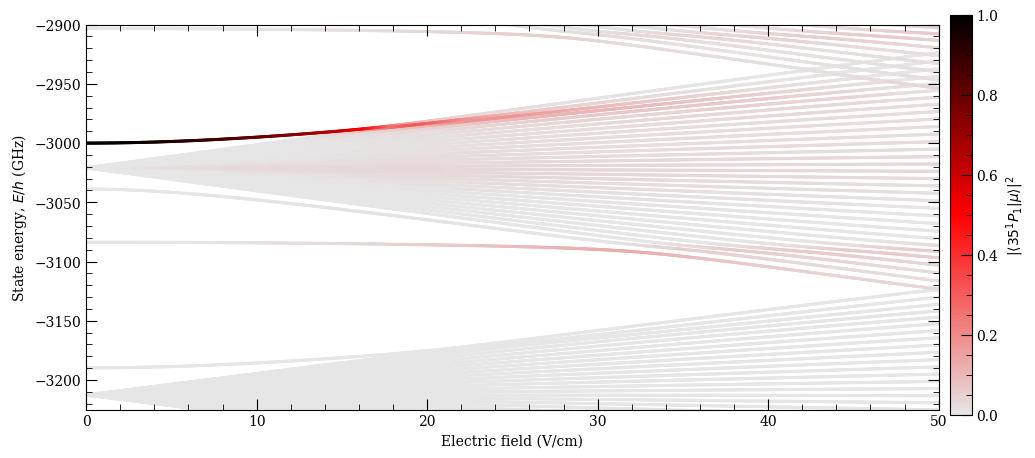

0

In [10]:
## Stark Map

calc = StarkMap(Calcium40())

# Target state
n0 = 35
l0 = 1
j0 = 1
mj0 = 0
s0 = 0
state0 = np.array([n0,l0,j0,mj0])
# Define max/min n values in basis
nmin = n0 - 3
nmax = n0 + 3
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = nmax - 1

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=s0)

Emin = 0.0  # Min E field (V/m)
Emax = 50.0e2  # Max E field (V/m)
N = 1001  # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin, Emax, N), progressOutput=True)

# Show Sark Map
calc.plotLevelDiagram(progressOutput=True, units='GHz', highlightState=True)
calc.ax.set_ylim(-3225,-2900 )
calc.showPlot(interactive=False)
# Return Polarizability of target state
#   print(
#    "%.5f MHz cm^2 / V^2 "
#    % calc.getPolarizability(showPlot=True, minStateContribution=0.9)
#)



Found  110  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


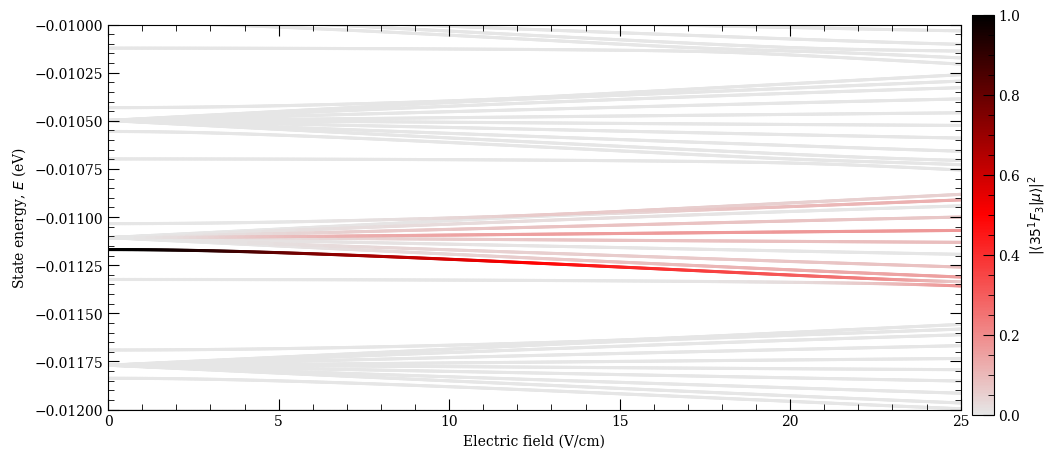

0

In [8]:
## Stark Map

calc = StarkMap(Calcium40())
#%matplotlib qt
# Target state
n0 = 35
l0 = 3
j0 = 3
mj0 = 0
s0 = 0
state0 = np.array([n0,l0,j0,mj0])
# Define max/min n values in basis
nmin = n0 - 5
nmax = n0 + 5
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = 10

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=s0)

Emin = 0.0  # Min E field (V/m)
Emax = 25.0e2  # Max E field (V/m)
N = 1001  # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin, Emax, N), progressOutput=True)

# Show Sark Map
calc.plotLevelDiagram(progressOutput=True, units="eV", highlightState=True)
calc.ax.set_ylim(-0.012,-0.010 )
calc.showPlot(interactive=False)
# Return Polarizability of target state
#   print(
#    "%.5f MHz cm^2 / V^2 "
#    % calc.getPolarizability(showPlot=True, minStateContribution=0.9)
#)

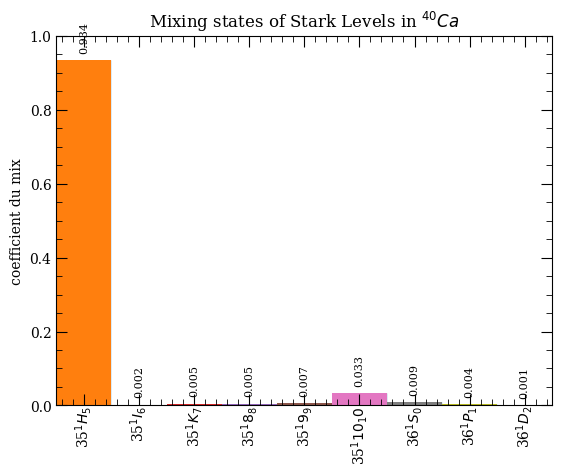

In [9]:
a=calc.highlight[100]
# la fonction highlight contient la liste de tous les états qui sont calculés et modifie leur coef en fonction du champ electrique

MixingStates_Coef = []#list

MixingStates_Term = []#list

for i in range(len(a)):
    if a[i] > 10**-3 :
        #print('i=',i)
        #print("{}\t{}".format(calc.basisStates[i],a[i]))
        #print(len(a))
        #print(len(calc.basisStates))
        #print(calc.basisStates)

        MixingStates_Coef.append(a[i])
        MixingStates_Term.append(calc.basisStates[i])
        #print(calc.basisStates[i],'i')
        #print(calc.basisStates[i-1],'i-1')
        #print(calc.basisStates[i + 1], 'i+1')
    else :
        pass
#print('coef=',MixingStates_Coef)
# still need to check that highlight and basisStates are arranged the same way.

# histogramm of the mixingstates

n_bins = len(MixingStates_Coef)
MixingStates_Coef = np.array(MixingStates_Coef)
MixingStates_Term = np.array(MixingStates_Term)
#for i in range(len(MixingStates_Coef)):
#    MixingStates_Coef[i] = '%.2E' % Decimal(MixingStates_Coef[i])
# make data:
## separation of information for the term matrix
#x = []
#for i in range(len(MixingStates_Term)):
#    x.append(i+0.5)
# transform list of quantum numbers into terms
# in general terms are written such so ^2S+1L_J
def Term(n,l,j,s):
    first_quantum_number = n
    Spin_part = 2*s+1

    if l==0 :
        orbital = "S"
    elif l==1:
        orbital = "P"
    elif l==2:
        orbital = "D"
    elif l==3:
        orbital ="F"
    elif l==4:
        orbital = "G"
    elif l==5:
        orbital = "H"
    elif l==6:
        orbital = "I"
    elif l==7:
        orbital = "K"
    else :
        orbital = int(l)

    term = "{N}$^{S}{L}_{J}$"
    return term.format(N=int(first_quantum_number),J = int(j),L = orbital,S=int(Spin_part))
# now we rewrite the list of list as a list of terms
MixingStates_Term_new = []
#(MixingStates_Term)
for i in range(len(MixingStates_Term)):

    MixingStates_Term_new.append(Term(MixingStates_Term[i][0],MixingStates_Term[i][1],MixingStates_Term[i][2],MixingStates_Term[i][3]))

x = MixingStates_Term_new

y = MixingStates_Coef

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.5)
multiplier = 0
for coef in MixingStates_Coef:
    offset = multiplier
    rects = ax.bar(offset,coef ,width=1)
    ax.bar_label(rects,labels=[f"{coef:.3f}" for coef in rects.datavalues], padding=5, fontsize=8, rotation='vertical')
    multiplier+=1
#length of axes should be adjusted to the number of relevant states in the mixing state
ax.set(xlim=(-0.5, len(MixingStates_Coef)-0.5),
       ylim=(0, 1))
ax.set_ylabel('coefficient du mix')
ax.set_title(r'Mixing states of Stark Levels in $^{40}Ca$')
ax.tick_params(axis='x',pad=0)
plt.xticks(rotation = 90)
plt.show()

In [10]:
"""
NE FONCTIONNE PAS ENCORE

from PIL import Image

image = Image.open("stark.jpeg")
with open("image.pickle", "wb") as file:
    pickle.dump(image, file) 
"""


'\nNE FONCTIONNE PAS ENCORE\n\nfrom PIL import Image\n\nimage = Image.open("stark.jpeg")\nwith open("image.pickle", "wb") as file:\n    pickle.dump(image, file) \n'

In [11]:
"""
figx = pickle.load(open('image.pickle', 'rb'))
figx.show() # Show the figure, edit it, etc.!
"""

"\nfigx = pickle.load(open('image.pickle', 'rb'))\nfigx.show() # Show the figure, edit it, etc.!\n"

Text(0.5, 1.0, 'Ca Quantum Defects')

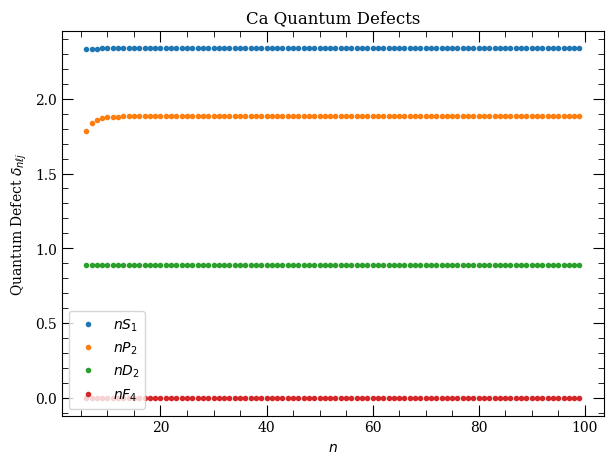

In [11]:
 
n = np.arange(6, 100, 1)

## a noter que ici c'est sans le calcium modifie, donc peu d'info.

# Plot Quantum Defects of Cs
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

axes.plot(n, atom.getQuantumDefect(n, 0, 0), ".", label="$nS_{1}$")
axes.plot(n, atom.getQuantumDefect(n, 1, 1), ".", label="$nP_{2}$")
axes.plot(n, atom.getQuantumDefect(n, 2, 0), ".", label="$nD_{2}$")
axes.plot(n, atom.getQuantumDefect(n, 3, 1), ".", label="$nF_{4}$")
axes.legend(loc=0)
axes.set_xlabel("$n$")
axes.set_ylabel(r"Quantum Defect $\delta_{n\ell j}$")
axes.set_title("Ca Quantum Defects")

 Grace au papier de Gallagher, on peut essayer de trouver des quantum defect pour des l plus grands que ce que l'on a jusqu'à présent. Dans ce papier, il est presente une determination de l'energie par une perturbation. On a alors E = E_h - W, ou E_h est l'energie de l'atome d'hydrogene. La formule de l'energie d'atomes de Rydberg n'est pas utilise MAIS on peut simplement faire une equivalence entre ces deux formules pour determiner les QD pour les niveaux qui nous interesses. 
 


$$ E = - \frac{1}{2n^2} - W_{pol,nl} = - \frac{1}{2(n-\delta_{nl})^2}  $$ 
$$ W_{pol,nl}=-\frac{1}{2}k_d\alpha_d \langle r^{-4} \rangle _{nl} - \frac{1}{2}k_q \alpha_q \langle r^{-6} \rangle _{nl}$$

On va utiliser les valeurs présentes pour le plus haut n que l'on ait a disposition en se disant que pour les niveaux qui nous interesses, sa valeur n'en sera pas trop eloignee (les valeurs ne changent pas enormement). Pour montrer que cela n'affecte pas trop, on pourrait faire un graphique des valeurs de k_d,... pour chaque n et faire une regression lineaire par exemple.

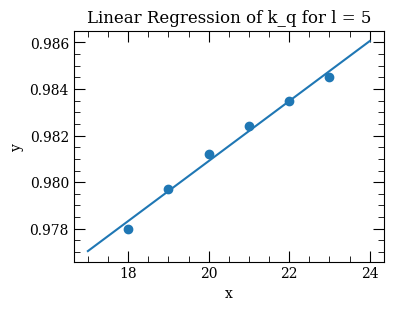

In [12]:
from sklearn.linear_model import LinearRegression
y = np.array([0.9780, 0.9797, 0.9812, 0.9824, 0.9835, 0.9845])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_q for l = 5")
plt.show()

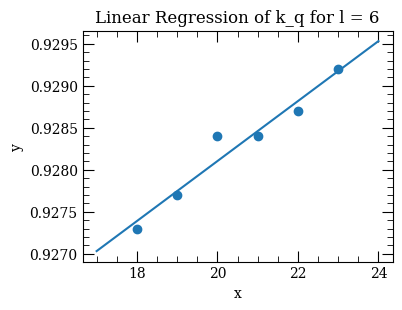

In [13]:
y = np.array([0.9273, 0.9277, 0.9284, 0.9284, 0.9287, 0.9292])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_q for l = 6")
plt.show()

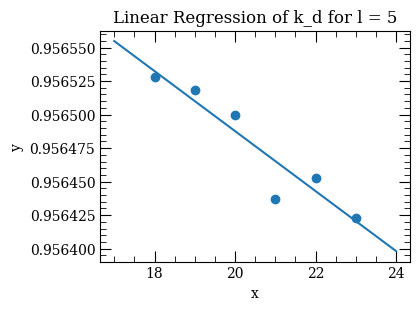

In [14]:
y = np.array([0.956528, 0.956518, 0.956500, 0.956437, 0.956453, 0.956423])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 5")
plt.show()

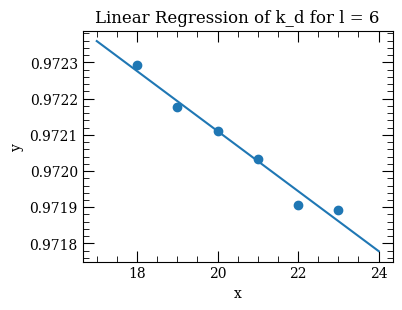

In [15]:
y = np.array([0.972293, 0.972178, 0.972111, 0.972033, 0.971906, 0.971892])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 6")
plt.show()

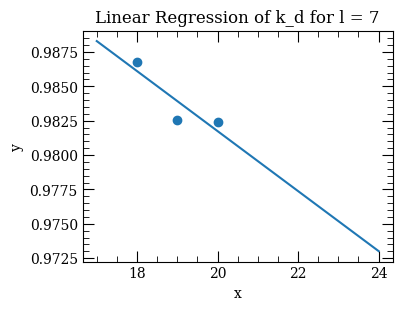

In [16]:
y = np.array([0.98680, 0.982543, 0.982437])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 7")
plt.show()

In [17]:
## on a un range pour les valeurs de a_d et a_q, donc faudra faire des tests pour voir ce qui semble ok ou pas. Voir faire plusieurs fois les calculs et voir tout ce qui pourrait se passer, a quel point un calcul est affecte par tel ou telle valeur choisi des coeff. (difference d'ordre de grandeur ?)

a_0 = 5.291772109*10**-11

k_d = np.array([0.956423,0.971892,0.982437]) # for respectively l=5,6,7
k_q = np.array([0.9845, 0.9292, 0.9376]) # for respectively l=5,6,7

# the values of alpha_d and alpha_q are bounded. 
alpha_d_low = 75.3*a_0**3
alpha_d_high = 76.9*a_0**3
alpha_q_low = 206*a_0**5
alpha_q_high = 1590*a_0**5


In [18]:
"""
From Chap 2 of Gallagher we can define the expectation values of powers of e-/nucleus distances
"""
def r4_expectation(n, ell):
    """
    Calcule la valeur de <1/r^4> en fonction de n et ell.
    """
    numerator = 3 * n**2 - ell * (ell + 1)
    denominator = (2 * n**5 * (ell + 3/2) * (ell + 1) * (ell + 1/2) * ell * (ell - 1/2))
    return numerator / denominator

def r6_expectation(n, ell):
    """
    Calcule la valeur de <1/r^6> en fonction de n et ell.
    """
    numerator = (35 * n**4 
                 - 5 * n**2 * (6 * ell * (ell + 1) - 5) 
                 + 3 * (ell + 2) * (ell + 1) * ell * (ell - 1))
    denominator = (8 * n**7 * (ell + 5/2) * (ell + 2) * (ell + 3/2) * 
                   (ell + 1) * (ell + 1/2) * ell * (ell - 1/2) * (ell - 1) * (ell - 3/2))
    return numerator / denominator

"""
noting that in gallagher, it's refered to two references where alpha_q is around 870. 
"""
"""def W_polarization_energy_shift (n, l, k_d, k_q,alpha_d = alpha_d_mid, alpha_q=alpha_q_mid):
    """
"""
    :param n: principal quantum number
    :param l: secondary quantum number
    :param alpha_d: alpha dipole
    :param alpha_q: alpha quandrupole   
    :param k_d: k dipole
    :param k_q: k quandrupole
    :param r**-4 : expectation values of power of distance electron-nucleus
    :return: value of the energy shift (real_E=E_hydrogen-W)
    """
"""
    x = -1/2*k_d*alpha_d*()-1/2*k_q*alpha_q*()
    print("polarization energy shift of",n,l,"=",x)
    return x"""
def print_n_l(n, l):
    return f"n={n}, l={l}"  # Return a formatted string instead of printing



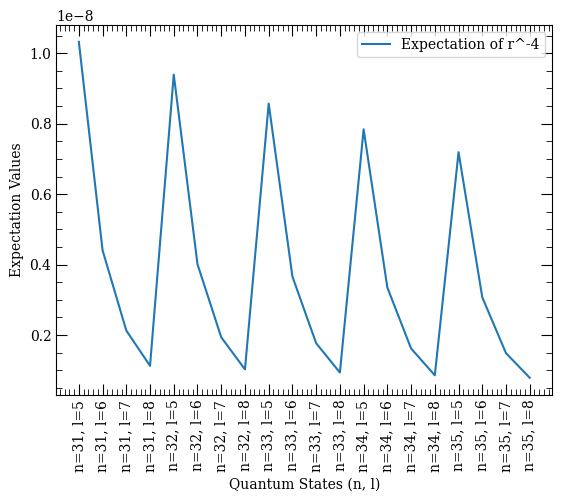

In [19]:
x4 = []
y4 = []

nombre_quantique_principal_test = 35
for i in range(30,nombre_quantique_principal_test):

    for j in range(4,8):
        
        if j > 3 : 
            x4.append(print_n_l(i+1,j+1))
            y4.append(r4_expectation(i+1,j+1))
            
        else :
            pass
fig, ax = plt.subplots()
ax.plot(x4, y4, label="Expectation of r^-4")

ax.set_xlabel("Quantum States (n, l)")
ax.set_ylabel("Expectation Values")
ax.legend()
plt.xticks(rotation=90,fontsize=10)  # Rotate x-axis labels for readability if needed
plt.show()
        

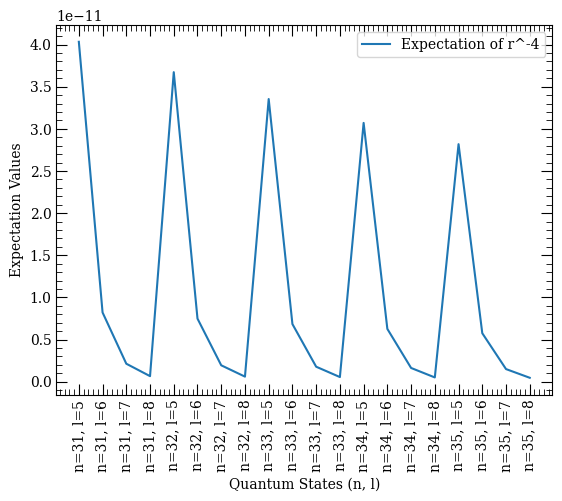

In [20]:
x6 = []
y6 = []

nombre_quantique_principal_test = 35
for i in range(30,nombre_quantique_principal_test):

    for j in range(4,8):
        
        if j > 3 : 
            x6.append(print_n_l(i+1,j+1))
            y6.append(r6_expectation(i+1,j+1))
            
        else :
            pass
fig, ax = plt.subplots()
ax.plot(x6, y6, label="Expectation of r^-4")

ax.set_xlabel("Quantum States (n, l)")
ax.set_ylabel("Expectation Values")
ax.legend()
plt.xticks(rotation=90,fontsize=10)  # Rotate x-axis labels for readability if needed
plt.show()
        

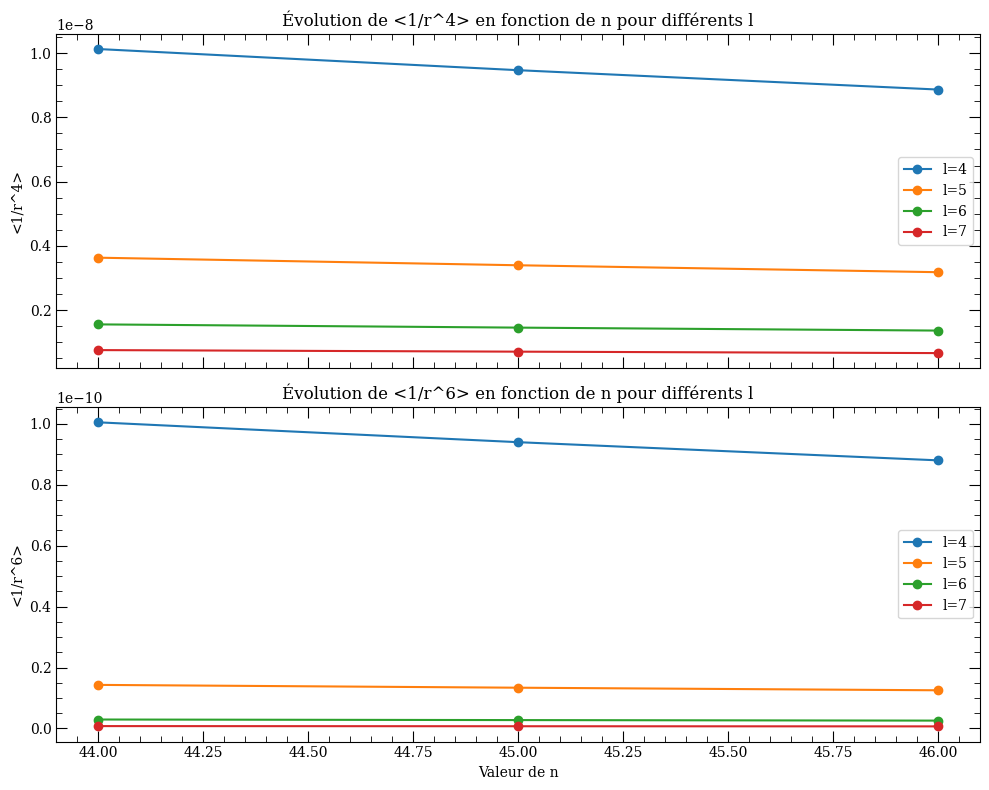

In [29]:
import matplotlib.pyplot as plt

# Initialisation des listes pour stocker les valeurs de n, r4 et r6
n_values = range(44, 47)  # n entre 30 et 35
l_values = range(5, 8)    # l entre 5 et 7

# Initialisation des dictionnaires pour stocker les valeurs de <1/r^4> et <1/r^6> pour chaque l
r4_values = {l: [] for l in l_values}
r6_values = {l: [] for l in l_values}

# Calcul des valeurs pour chaque combinaison de n et l
for n in n_values:
    for l in l_values:
        r4 = r4_expectation(n, l)
        r6 = r6_expectation(n, l)
        r4_values[l].append(r4)
        r6_values[l].append(r6)

# Création du graphique
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Tracé de <1/r^4> pour chaque valeur de l
for l in l_values:
    ax[0].plot(n_values, r4_values[l], 'o-', label=f'l={l}')
ax[0].set_ylabel("<1/r^4>")
ax[0].set_title("Évolution de <1/r^4> en fonction de n pour différents l")
ax[0].legend()

# Tracé de <1/r^6> pour chaque valeur de l
for l in l_values:
    ax[1].plot(n_values, r6_values[l], 'o-', label=f'l={l}')
ax[1].set_xlabel("Valeur de n")
ax[1].set_ylabel("<1/r^6>")
ax[1].set_title("Évolution de <1/r^6> en fonction de n pour différents l")
ax[1].legend()

plt.tight_layout()
plt.show()

les valeurs de r4 et r6 sont correctes. J'ai testé pour n = 45 et l = 7 et on retombe exactement sur les valeurs calculees dans le code de Alisée.

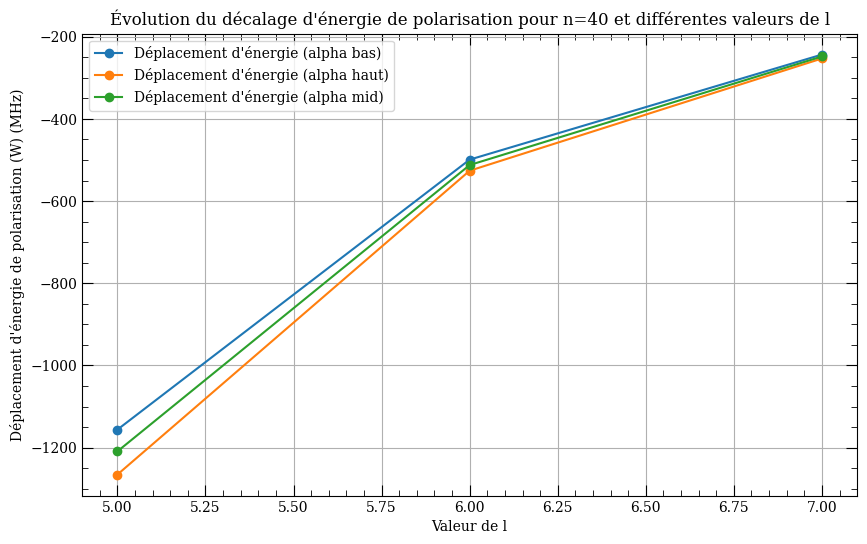

[np.float64(-1265.3922754419068), np.float64(-526.1173637349427), np.float64(-253.07759390688497)]
[np.float64(-1156.0610353997592), np.float64(-499.1467105363781), np.float64(-243.58943823416234)]
[np.float64(-1209.0062778890197), np.float64(-512.2999107141753), np.float64(-248.24599652414307)]


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constante a_0
a_0 = 1 # ua
# = 5.291772109 * 10**-11 # mètre

# Valeurs spécifiques de k_d et k_q pour l = 5, 6, 7
k_d_values = np.array([0.956423, 0.971892, 0.982437])
k_q_values = np.array([0.9845, 0.9292, 0.9376])

# Limites pour alpha_d et alpha_q
alpha_d_low = 75.3 * a_0**3
alpha_d_high = 76.9 * a_0**3
alpha_q_low = 206 * a_0**5
alpha_q_high = 1590 * a_0**5
alpha_d_mid = (alpha_d_low + alpha_d_high) / 2
alpha_q_mid = 870 * a_0**5

h_planck = 1 #u.a.#6.626e-34 #J*s

# Fonction pour le calcul du décalage d'énergie de polarisation
def W_polarization_energy_shift(n, l, alpha_d, alpha_q, k_d, k_q, units = 'MHz'): #m-1 ？
    """
    Calcule le décalage d'énergie de polarisation.
    
    :param n: principal quantum number
    :param l: secondary quantum number
    :param alpha_d: alpha dipole
    :param alpha_q: alpha quadrupole
    :param k_d: k dipole
    :param k_q: k quadrupole
    :param units: units
    :return: valeur du décalage d'énergie
    """
    # Calcul des valeurs de <1/r^4> et <1/r^6>
    r4 = r4_expectation(n, l)
    r6 = r6_expectation(n, l)

    
    # Calcul du décalage d'énergie
    x = -0.5 * k_d * alpha_d * r4 - 0.5 * k_q * alpha_q * r6
    x /= h_planck
    if units == 'MHz':
        x *= 6.5797*10**9
    else :
        pass

    return x

# Initialisation des listes pour stocker les résultats
l_values = [5, 6, 7]
n = 40
energy_shifts_low = []
energy_shifts_high = []
energy_shifts_mid = []

# Calcul des décalages d'énergie pour chaque l avec les valeurs limites de alpha_d et alpha_q
for i, l in enumerate(l_values):
    # Pour alpha_d et alpha_q bas
    shift_low = W_polarization_energy_shift(n, l, alpha_d_low, alpha_q_low, k_d_values[i], k_q_values[i])
    energy_shifts_low.append(shift_low)
    
    # Pour alpha_d et alpha_q haut
    shift_high = W_polarization_energy_shift(n, l, alpha_d_high, alpha_q_high, k_d_values[i], k_q_values[i])
    energy_shifts_high.append(shift_high)
    
    # Pour alpha_d et alpha_q mid
    shift_mid = W_polarization_energy_shift(n, l, alpha_d_mid, alpha_q_mid, k_d_values[i], k_q_values[i])
    energy_shifts_mid.append(shift_mid)
# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(l_values, energy_shifts_low, 'o-', label="Déplacement d'énergie (alpha bas)")
plt.plot(l_values, energy_shifts_high, 'o-', label="Déplacement d'énergie (alpha haut)")
plt.plot(l_values, energy_shifts_mid, 'o-', label="Déplacement d'énergie (alpha mid)")
plt.xlabel("Valeur de l")
plt.ylabel("Déplacement d'énergie de polarisation (W) (MHz)")
plt.title(f"Évolution du décalage d'énergie de polarisation pour n={n} et différentes valeurs de l")
plt.legend()
plt.grid(True)
plt.show()
print(energy_shifts_high)
print(energy_shifts_low)
print(energy_shifts_mid)


Les différences entre les valeurs low et high ne sont pas très grande mais peuvent quand même atteindre 150MHz pour le cas l=5.
Pour voir si c'est un problème, on va regarder ce que calcule comme diff d'E W pour un cas l=5 que l'on peut calculer. Le plus haut niveau mesuré dans le NIST contenant un l=5 est le $14H^5$ qui a une énergie de -16744.283409999916 GHz par rapport à l'énergie d'ionisation.


In [23]:
atom.getEnergy(14,5,5,0) # = -16784.68647039

fifteenHwoQD = -16784.68647039 + 16744.283409999916
print(fifteenHwoQD)

-40.40306039008283


That calculation is done with a ∂_5=0. But the W calculated is around 25GHz. NIST has  a "level splittings (GHz) of 100 for that level". What does it mean in this case ?

In [31]:
import math
import pandas as pd
from IPython.display import display, HTML
## We define a function computing the W_low for a given n and l = 5,6,7 as it looks its the one that suits the most other code value.
def compute_all (n_array):
    '''

    :param n_array: liste des valeurs de n calculés

    :return: liste des valeurs des shifts d'énergies de polarisation par valeur de n cal
    '''
    # structure des données pour stocker par valeur de n calc
    results_by_n = []
    for n in n_array:
        energy_shifts_low = []
        for i, l in enumerate(l_values):

            shift_low = W_polarization_energy_shift(n, l, alpha_d_low, alpha_q_low, k_d_values[i],k_q_values[i])
            energy_shifts_low.append(shift_low)
        results_by_n[n] = energy_shifts_low

    return results_by_n


def compute_one_low(n,l):
    '''

    :param n: nombre qunatique n
    :param l: secondary nombre qunatique l=5,6,7

    :return: valeur du shift d'energie de polarisation pour n et l donné
    '''
    # structure des données pour stocker par valeur de n calc
    i = l-l_values[0]
    shift_low = W_polarization_energy_shift(n, l, alpha_d_low, alpha_q_low, k_d_values[i],k_q_values[i])

    return shift_low




Ry = 3.2898e15 #Hz
'''Pour une valeur de $nl$ donné, on a une valeur d'energie qui se calcule par la formule 
E = -1/2n^2-W_nl

def energy_w(n,l,a_d,a_q,k_d,k_q):
    E = -1/(2*n**2)-W_polarization_energy_shift(n,l,a_d,a_q,k_d,k_q)
    return E
###############VIEUX
globalement ce qu'on est capable de calculer c'est le terme delta_nl qui contient la somme en question avec delta0, delta2, delta4
'''
R_inf = 1.097373156850*10**7 #m^-1
"""
def quantum_defect_nl (n,l,k_d,k_q,alpha_d=alpha_d_mid,alpha_q=alpha_q_mid):
    print(n,l,k_d,k_q,alpha_d,alpha_q)
    #print('W=',1/((2*n**2)+W_polarization_energy_shift(n,l,alpha_d,alpha_q,k_d,k_q)**(-1)))
    #q = n - math.sqrt(R_inf*(1/(2*n**2)+W_polarization_energy_shift(n,l,alpha_d,alpha_q,k_d,k_q))**(-1))
    W = W_polarization_energy_shift(n,l,k_d,k_q,alpha_d,alpha_q)
    #print(W)
    frac = 1/(2*n**2)
    #print(frac)
    x = frac + W
    #print(x)
    x = 1/x
    #print(x)
    x = R_inf*x
    #print(x)
    x = math.sqrt(x)
    #print(x)
    
    
    q = n - x
    #print('q=',q)
     return q
 """
def delta_nl(en):

    deltatest = n - ( 1/ (np.sqrt( (en*10**6/Ry) + (1/n**2) )) ) #10**6 factor is used to convert in Hz

    return deltatest

def ritz_rydberg(n, delta_0, delta_2, delta_4):
    return delta_0 + delta_2 / (n - delta_0) ** 2 + delta_4 / (n - delta_0) ** 4

def create_quantum_table(y2):
    # Création des données
    data = []
    for i in range(len(y2)):
        data.append({
            'l (orbital)': 7+i,
            'W (MHz)': float(y2[i]),

            'delta_nl ': float(delta_nl(y2[i])),

        })

    # Création du DataFrame
    df = pd.DataFrame(data)

    # Style personnalisé pour un beau rendu
    style = """
    <style>
        table {width: 100%; border-collapse: collapse; margin: 25px 0; font-size: 0.9em;}
        th, td {padding: 12px 15px; text-align: center;}
        thead {background-color: #435B66; color: white;}
        tbody tr:nth-of-type(even) {background-color: #f3f3f3;}
        td {border-bottom: 1px solid #dddddd;}
        th:first-of-type {text-align: left;}
        td:first-of-type {text-align: left;}
    </style>
    """

    # Formatage des nombres en notation scientifique avec 6 décimales
    pd.options.display.float_format = '{:.6e}'.format

    # Affichage avec le style personnalisé
    display(HTML(style + df.to_html(index=False)))

    return df  # Retourne aussi le DataFrame pour d'éventuelles manipulations




In [32]:
ndata = list(range(30, 105))
# Dictionnaire pour stocker delta_nl pour chaque l
delta_by_l = {}
delta_by_l_neg = {}

# Boucle sur les valeurs de l
for l in l_values:
    delta_by_l[l] = []
    delta_by_l_neg[l]= []# Initialise une liste pour ce l

    # Boucle sur les valeurs de n
    for n in ndata:
        shift = 0
        shift = compute_one_low(n,l)
        delta_by_l[l].append(delta_nl(shift))
        delta_by_l_neg[l].append(-delta_nl(shift))


def plot_quantum_defects(delta_by_l, ndata, l_values):
    n_plots = len(l_values)
    n_cols = min(3, n_plots)  # Définition des colonnes pour un affichage compact
    n_rows = (n_plots + n_cols - 1) // n_cols  # Calcul du nombre de lignes

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))

    # Gestion du cas où un seul subplot est généré
    if n_rows * n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # Itération sur les valeurs de l
    for idx, l in enumerate(l_values):
        ax = axes[idx]

        # Vérification que l existe bien dans delta_by_l
        if l not in delta_by_l:
            continue

        # Récupération des défauts quantiques pour chaque n
        y2_values = np.array(delta_by_l[l])

        # Tracé des points
        ax.scatter(ndata, y2_values, marker='>', label=f'l={l}')

        # Échelle logarithmique en y
        ax.set_yscale('log')

        # Labels et titre
        ax.set_xlabel('Principal quantum number n')
        ax.set_ylabel('Quantum defect')
        ax.set_title(f'Orbital quantum number l = {l}')
        ax.legend()

        # Grille
        ax.grid(True, which="both", ls="-", alpha=0.2)

    # Suppression des subplots vides si nécessaire
    for idx in range(len(l_values), len(axes)):
        fig.delaxes(axes[idx])

    # Ajustement de la mise en page

    plt.tight_layout()
    return fig




fig = plot_quantum_defects(delta_by_l_neg, ndata, l_values)

plt.show()

def ritz_rydberg(n, delta_0, delta_2, delta_4):
    return delta_0 + delta_2 / (n - delta_0) ** 2 + delta_4 / (n - delta_0) ** 4

IndexError: index 3 is out of bounds for axis 0 with size 3

Paramètres optimisés pour l=5 :
delta_0 = 0.011318
delta_2 = -0.107735
delta_4 = -2.756211


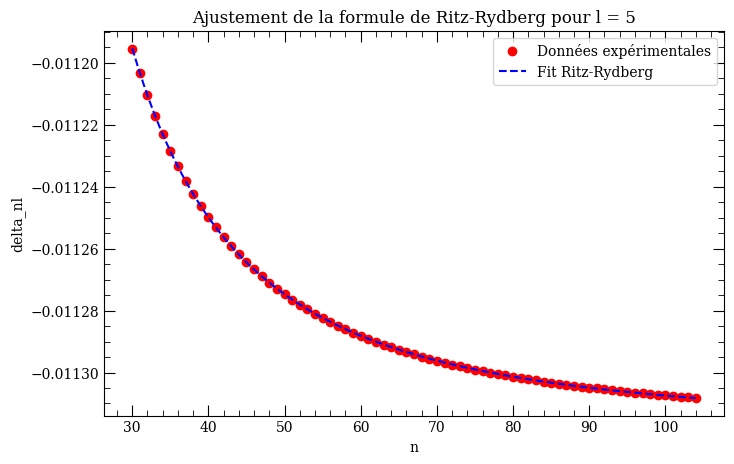

In [26]:
import scipy.optimize as opt
# Sélectionner un l particulier pour la régression (ex: l = 10)
l_value = 5  # Choisir une valeur de l
n_values = np.array(ndata)  # Liste des n

# Extraire les valeurs de delta_nl sans None
delta_nl_values = np.array([delta_by_l[l_value][i] for i in range(len(ndata)) if delta_by_l[l_value][i] is not None])
filtered_n = np.array([n_values[i] for i in range(len(ndata)) if delta_by_l[l_value][i] is not None])

#valeur positive pour le graphique

#delta_nl_values = - delta_nl_values
# Estimation initiale des paramètres (peut être ajustée)
p0 = [0.1, 1.0, 0.01]  # Valeurs initiales pour delta_0, delta_2, delta_4

# Ajustement par moindres carrés non linéaires
params, covariance = opt.curve_fit(ritz_rydberg, filtered_n, delta_nl_values, p0=p0)

# Extraire les paramètres optimisés
delta_0_opt, delta_2_opt, delta_4_opt = params

print(f"Paramètres optimisés pour l={l_value} :")
print(f"delta_0 = {-delta_0_opt:.6f}")
print(f"delta_2 = {-delta_2_opt:.6f}")
print(f"delta_4 = {-delta_4_opt:.6f}")

# Générer les valeurs de la courbe ajustée
n_fit = np.linspace(min(filtered_n), max(filtered_n), 100)  # Plus de points pour lisser la courbe
delta_fit = ritz_rydberg(n_fit, delta_0_opt, delta_2_opt, delta_4_opt)

# Affichage
plt.figure(figsize=(8,5))
plt.scatter(filtered_n, delta_nl_values, label="Données expérimentales", color='red', marker='o')
plt.plot(n_fit, delta_fit, label="Fit Ritz-Rydberg", linestyle='--', color='blue')
plt.xlabel("n")
plt.ylabel("delta_nl")
plt.legend()
plt.title(f"Ajustement de la formule de Ritz-Rydberg pour l = {l_value}")
plt.show()

Paramètres optimisés pour l=6 :
delta_0 = 0.004899
delta_2 = -0.067733
delta_4 = -0.522240


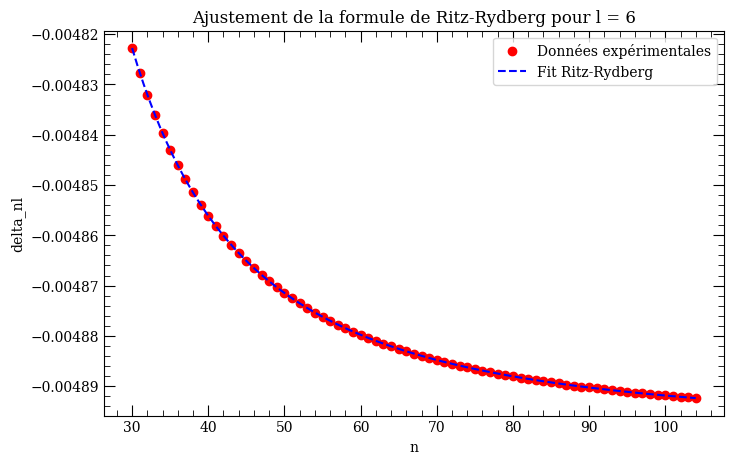

In [27]:
import scipy.optimize as opt
# Sélectionner un l particulier pour la régression (ex: l = 10)
l_value = 6 # Choisir une valeur de l
n_values = np.array(ndata)  # Liste des n

# Extraire les valeurs de delta_nl sans None
delta_nl_values = np.array([delta_by_l[l_value][i] for i in range(len(ndata)) if delta_by_l[l_value][i] is not None])
filtered_n = np.array([n_values[i] for i in range(len(ndata)) if delta_by_l[l_value][i] is not None])

#valeur positive pour le graphique

#delta_nl_values = - delta_nl_values
# Estimation initiale des paramètres (peut être ajustée)
p0 = [0.1, 1.0, 0.01]  # Valeurs initiales pour delta_0, delta_2, delta_4

# Ajustement par moindres carrés non linéaires
params, covariance = opt.curve_fit(ritz_rydberg, filtered_n, delta_nl_values, p0=p0)

# Extraire les paramètres optimisés
delta_0_opt, delta_2_opt, delta_4_opt = params

print(f"Paramètres optimisés pour l={l_value} :")
print(f"delta_0 = {-delta_0_opt:.6f}")
print(f"delta_2 = {-delta_2_opt:.6f}")
print(f"delta_4 = {-delta_4_opt:.6f}")

# Générer les valeurs de la courbe ajustée
n_fit = np.linspace(min(filtered_n), max(filtered_n), 100)  # Plus de points pour lisser la courbe
delta_fit = ritz_rydberg(n_fit, delta_0_opt, delta_2_opt, delta_4_opt)

# Affichage
plt.figure(figsize=(8,5))
plt.scatter(filtered_n, delta_nl_values, label="Données expérimentales", color='red', marker='o')
plt.plot(n_fit, delta_fit, label="Fit Ritz-Rydberg", linestyle='--', color='blue')
plt.xlabel("n")
plt.ylabel("delta_nl")
plt.legend()
plt.title(f"Ajustement de la formule de Ritz-Rydberg pour l = {l_value}")
plt.show()

Paramètres optimisés pour l=7 :
delta_0 = 0.002398
delta_2 = -0.044614
delta_4 = -0.126462


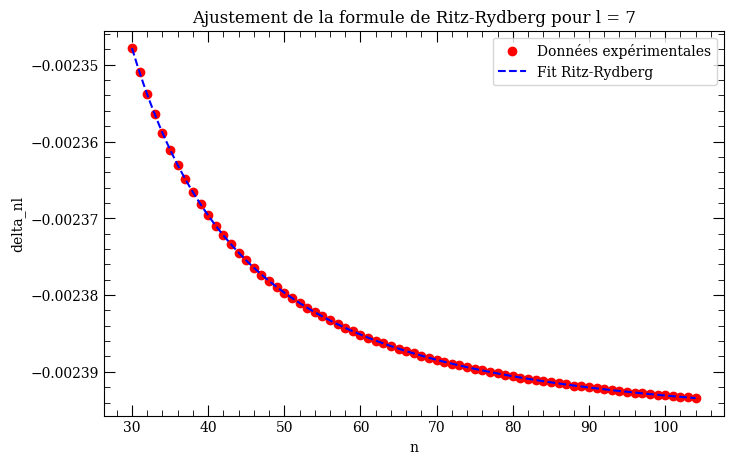

In [28]:
import scipy.optimize as opt
# Sélectionner un l particulier pour la régression (ex: l = 10)
l_value = 7  # Choisir une valeur de l
n_values = np.array(ndata)  # Liste des n

# Extraire les valeurs de delta_nl sans None
delta_nl_values = np.array([delta_by_l[l_value][i] for i in range(len(ndata)) if delta_by_l[l_value][i] is not None])
filtered_n = np.array([n_values[i] for i in range(len(ndata)) if delta_by_l[l_value][i] is not None])

#valeur positive pour le graphique

#delta_nl_values = - delta_nl_values
# Estimation initiale des paramètres (peut être ajustée)
p0 = [0.1, 1.0, 0.01]  # Valeurs initiales pour delta_0, delta_2, delta_4

# Ajustement par moindres carrés non linéaires
params, covariance = opt.curve_fit(ritz_rydberg, filtered_n, delta_nl_values, p0=p0)

# Extraire les paramètres optimisés
delta_0_opt, delta_2_opt, delta_4_opt = params

print(f"Paramètres optimisés pour l={l_value} :")
print(f"delta_0 = {-delta_0_opt:.6f}")
print(f"delta_2 = {-delta_2_opt:.6f}")
print(f"delta_4 = {-delta_4_opt:.6f}")

# Générer les valeurs de la courbe ajustée
n_fit = np.linspace(min(filtered_n), max(filtered_n), 100)  # Plus de points pour lisser la courbe
delta_fit = ritz_rydberg(n_fit, delta_0_opt, delta_2_opt, delta_4_opt)

# Affichage
plt.figure(figsize=(8,5))
plt.scatter(filtered_n, delta_nl_values, label="Données expérimentales", color='red', marker='o')
plt.plot(n_fit, delta_fit, label="Fit Ritz-Rydberg", linestyle='--', color='blue')
plt.xlabel("n")
plt.ylabel("delta_nl")
plt.legend()
plt.title(f"Ajustement de la formule de Ritz-Rydberg pour l = {l_value}")
plt.show()